# **Diamonds**
### Analyze diamonds by their cut, color, clarity, price, and other attributes


## **Context**
### This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

## **Content**
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [60]:
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt 
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np 
import os 
import pandas as pd 
import seaborn as sns
from scipy.stats import probplot
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('diamonds.csv')

data.head(20)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [6]:
print('Number of Examples = {}'.format(data.shape[0]))
print('X Shape = {}'.format(data.shape))
print('y Shape = {}\n'.format(data['price'].shape[0]))
print('Columns')
print(data.columns)

Number of Examples = 53940
X Shape = (53940, 11)
y Shape = 53940

Columns
Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')


In [11]:
data =data.drop(['Unnamed: 0'], axis=1)
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
def display_missing(df):    
    for col in df.columns.tolist():   
        if df[col].isnull().sum():       
            print('{} column missing values: {}/{}'.format(col, df[col].isnull().sum(),len(df)))
    print('\n')

display_missing(data)

In [12]:
#Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 10)

### It seems as though there is no missing data, Fantastic! Now let's look into the Target Distribution

Data Set price Skew: 1.6183486340820077
Data Set price Kurtosis: 2.1783905464441284
Data Set price Mean: 3930.993230712166
Data Set price Median: 2401.0
Data Set price Max: 18823


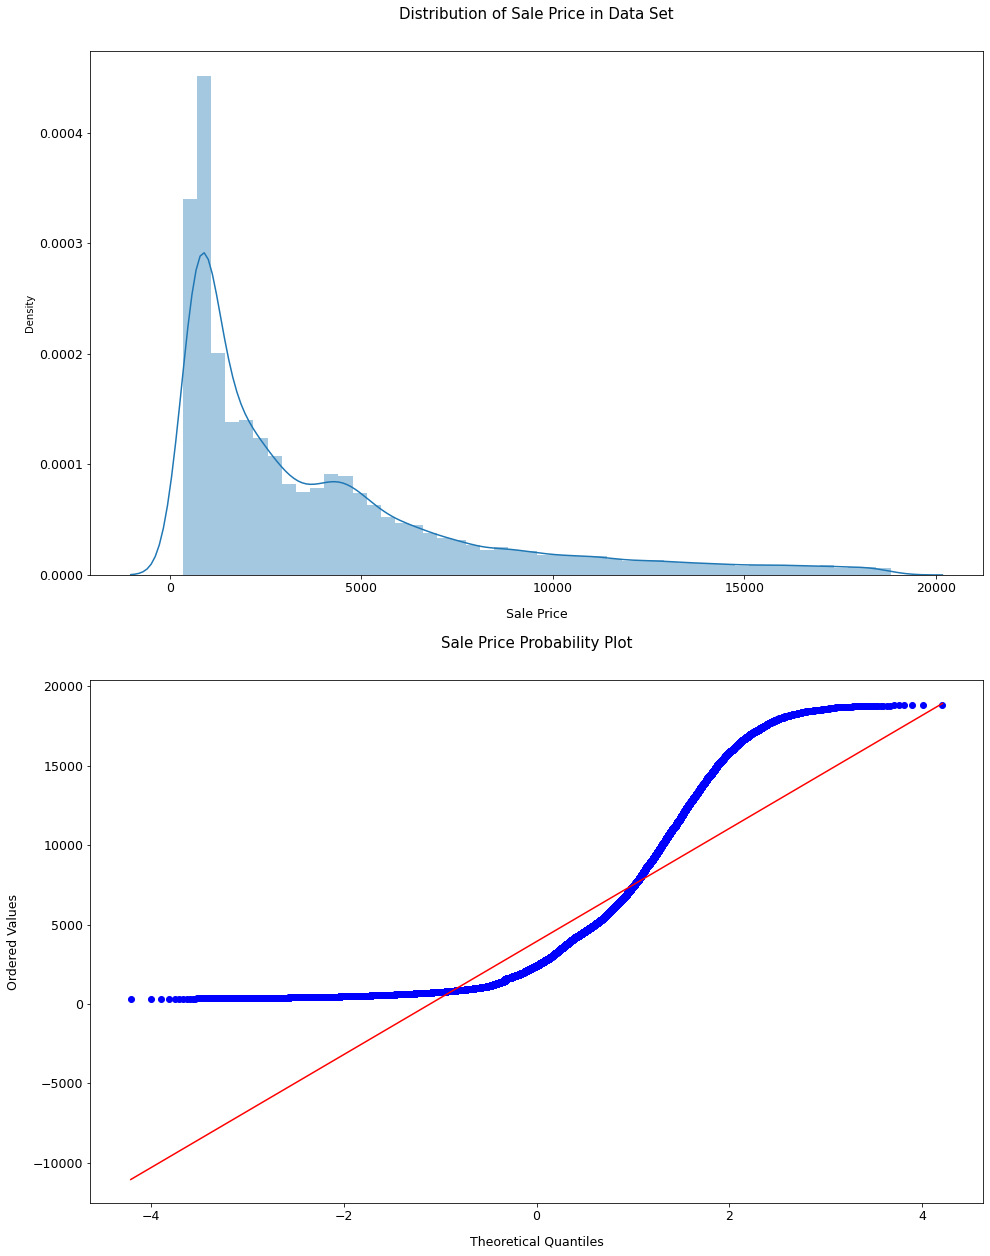

In [13]:
print('Data Set price Skew: {}'.format(data['price'].skew()))
print('Data Set price Kurtosis: {}'.format(data['price'].kurt()))
print('Data Set price Mean: {}'.format(data['price'].mean()))
print('Data Set price Median: {}'.format(data['price'].median()))
print('Data Set price Max: {}'.format(data['price'].max()))

fig, axs = plt.subplots(nrows=2, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None)

sns.distplot(data['price'], hist=True, ax=axs[0])
probplot(data['price'], plot=axs[1])

axs[0].set_xlabel('Sale Price', size=12.5, labelpad=12.5)
axs[1].set_xlabel('Theoretical Quantiles', size=12.5, labelpad=12.5)
axs[1].set_ylabel('Ordered Values', size=12.5, labelpad=12.5)

for i in range(2):
    axs[i].tick_params(axis='x', labelsize=12.5)
    axs[i].tick_params(axis='y', labelsize=12.5)

axs[0].set_title('Distribution of Sale Price in Data Set', size=15, y=1.05)
axs[1].set_title('Sale Price Probability Plot', size=15, y=1.05)

plt.show()

#### The distribution is not normal, as you can see, the distribution is positively skewed with a skew of 1.66. As a result the distribution is asymmetric which tells us that there are several outliers

#### Training set SalePrice kurtosis is 2.17 which indicates some tail extremity. Mean price is 3930.99, however, median is 2401. This huge gap between mean and median is also the effect of outliers.

#### Probability plot clearly illustrates that outliers will strongly affect the regression models since a single outlier may result in all predictor coefficients being biased. The probability being a convex curve rather than a straight line is the result of the skewness.

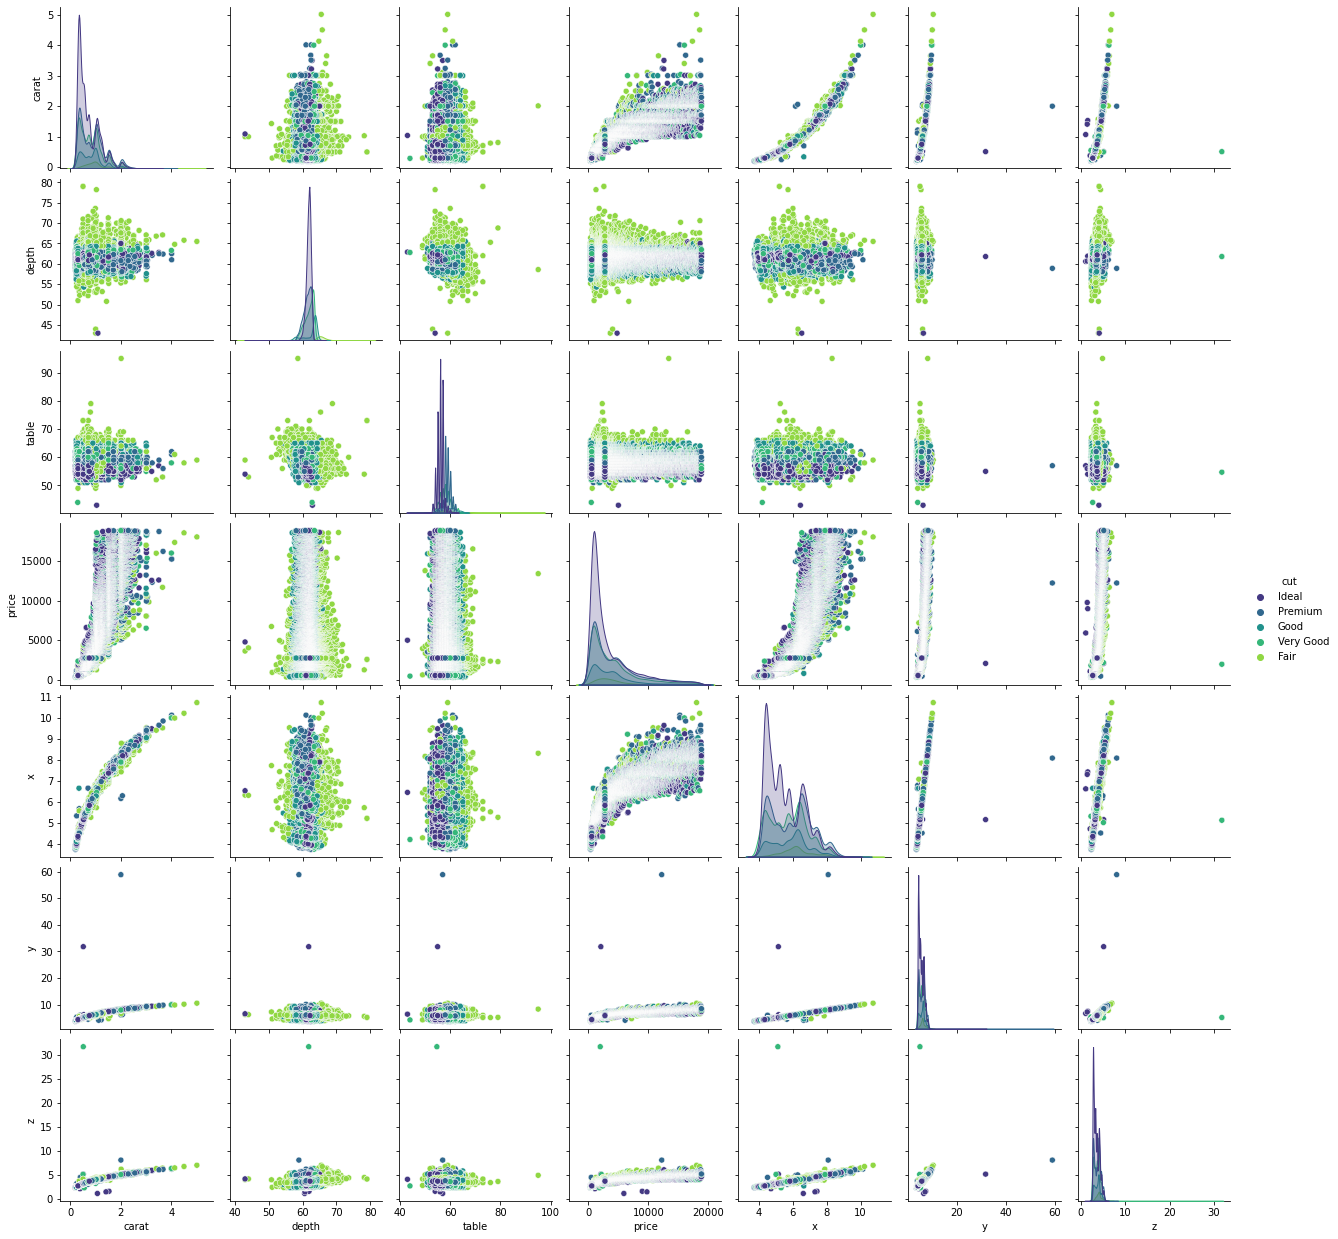

In [17]:
ax=sns.pairplot(data, hue= "cut",palette="viridis")

<AxesSubplot:xlabel='price', ylabel='y'>

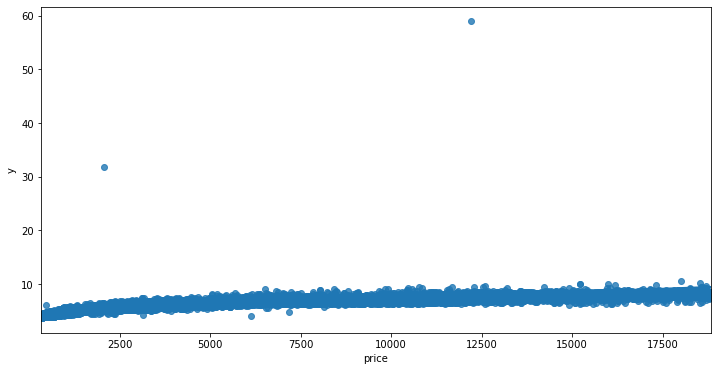

In [31]:
plt.figure(figsize=(12,6))

sns.regplot(x = "price", y = "y", data = data)


<AxesSubplot:xlabel='price', ylabel='z'>

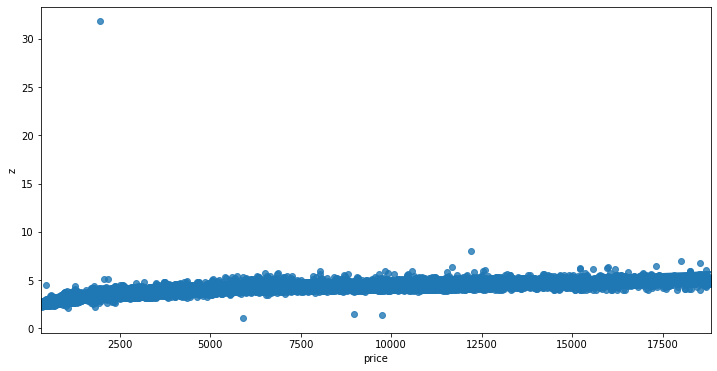

In [32]:
plt.figure(figsize=(12,6))

sns.regplot(x = "price", y = "z", data = data)


<AxesSubplot:xlabel='price', ylabel='depth'>

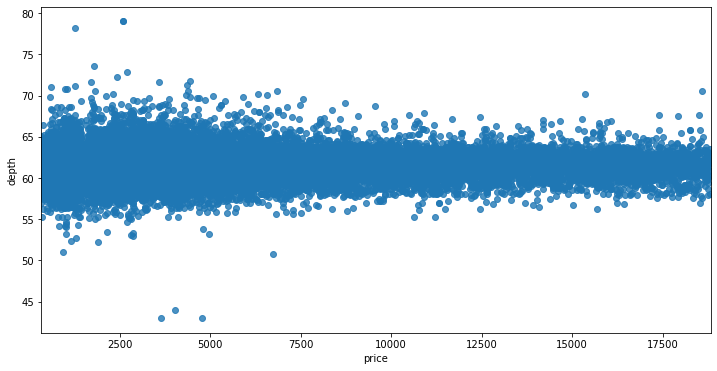

In [34]:
plt.figure(figsize=(12,6))

sns.regplot(x = "price", y = "depth", data = data)


<AxesSubplot:xlabel='price', ylabel='table'>

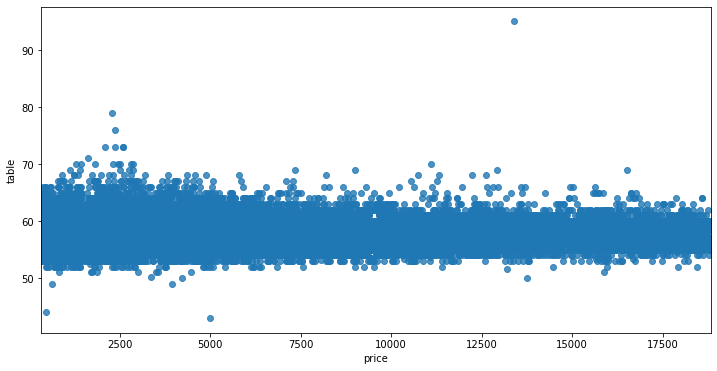

In [35]:
plt.figure(figsize=(12,6))

sns.regplot(x = "price", y = "table", data = data)


<AxesSubplot:xlabel='price', ylabel='carat'>

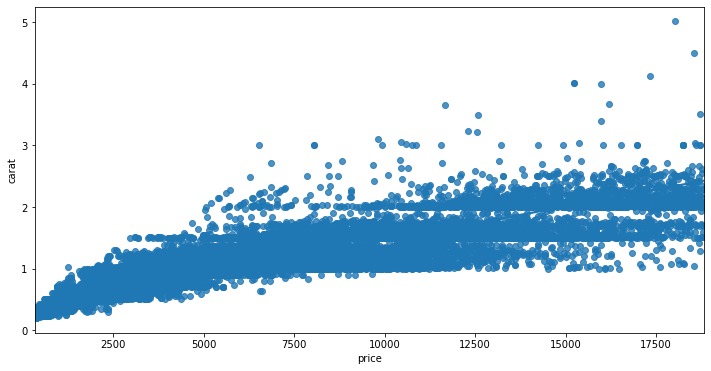

In [36]:
plt.figure(figsize=(12,6))

sns.regplot(x = "price", y = "carat", data = data)


### Now let's drop the outlier values

In [37]:
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(53907, 10)

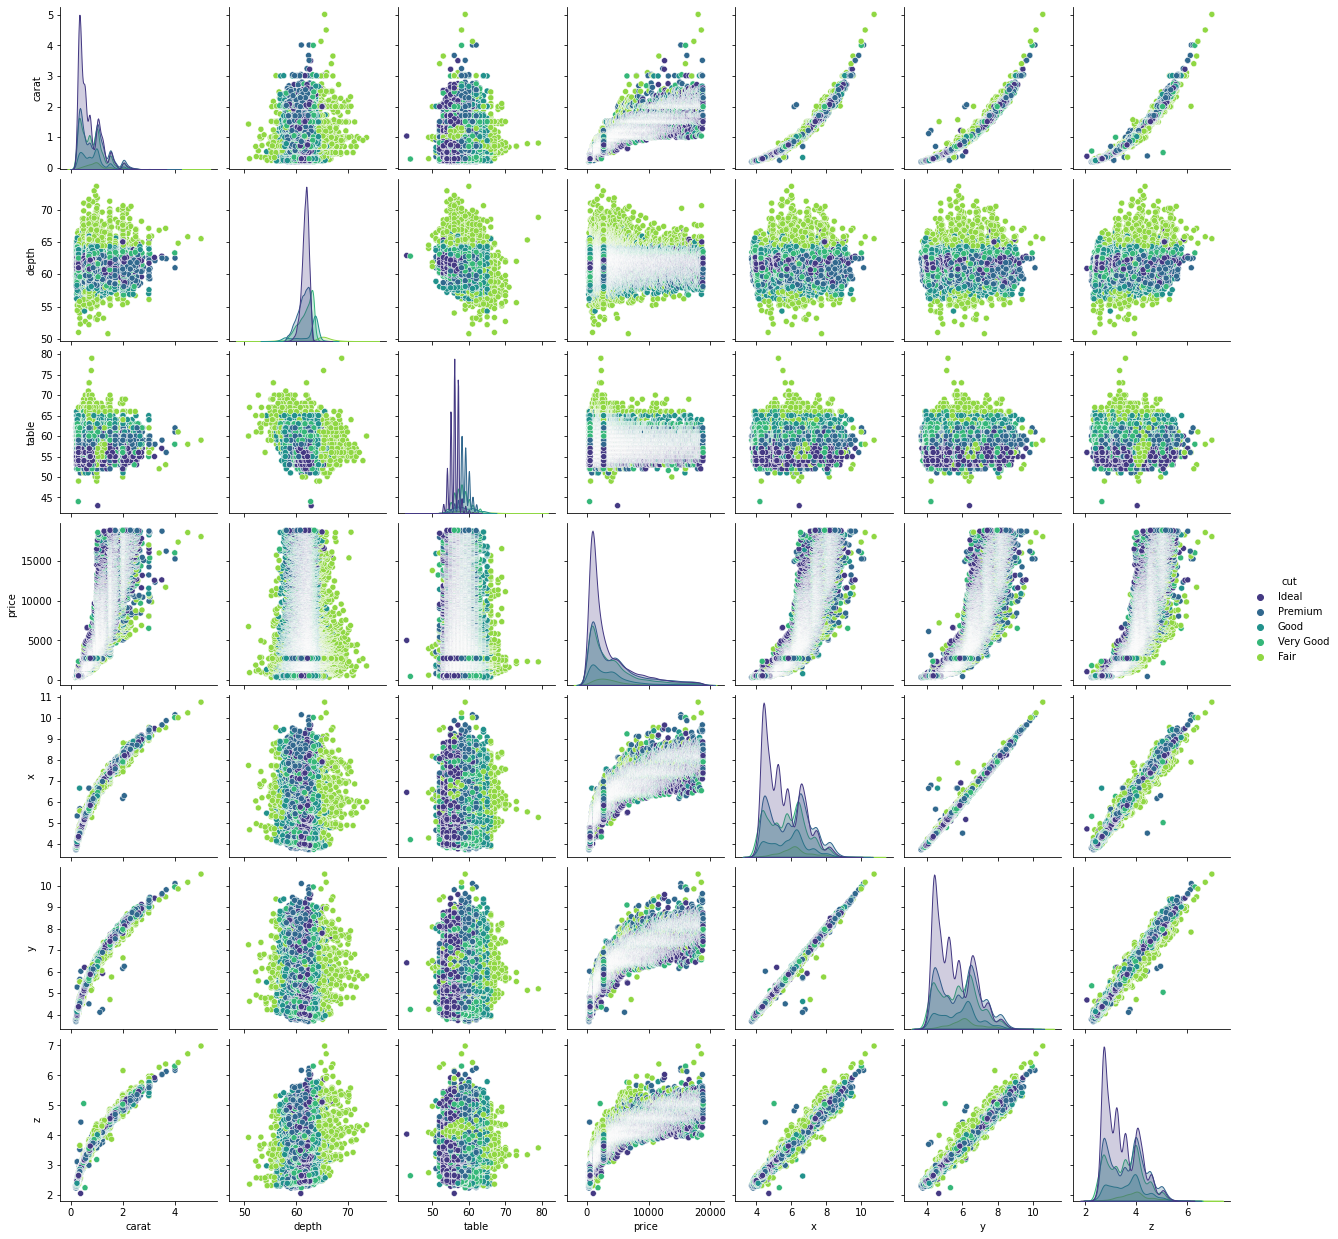

In [38]:
ax=sns.pairplot(data, hue= "cut",palette="viridis")

### Now that we have cleaned our dataset, let's extract a list of categorical variables

In [40]:
# Get list of categorical variables

s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [43]:
def get_cat(df):
    s = (data.dtypes =="object")
    object_cols = list(s[s].index)
    return object_cols

In [57]:
object_cols = get_cat(data)

Text(0.5, 1.05, 'Violinplot for Cut vs Price')

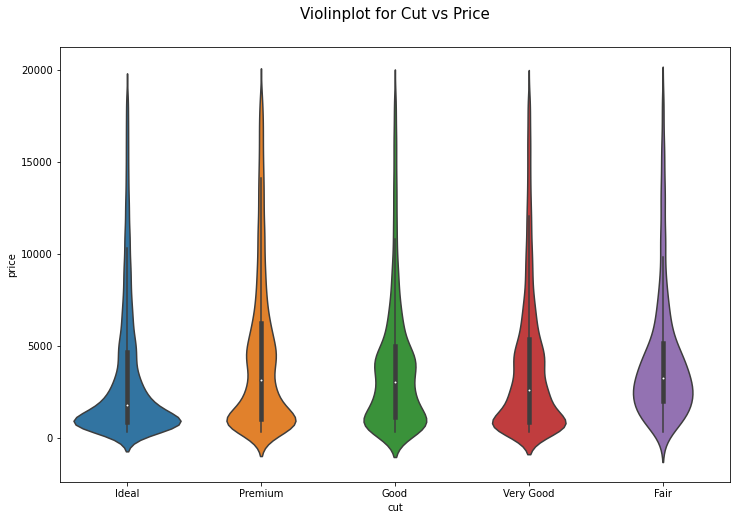

In [54]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="cut",y="price",data=data)
ax.set_title('Violinplot for Cut vs Price', size=15, y=1.05)


Text(0.5, 1.05, 'Violinplot for Colour vs Price')

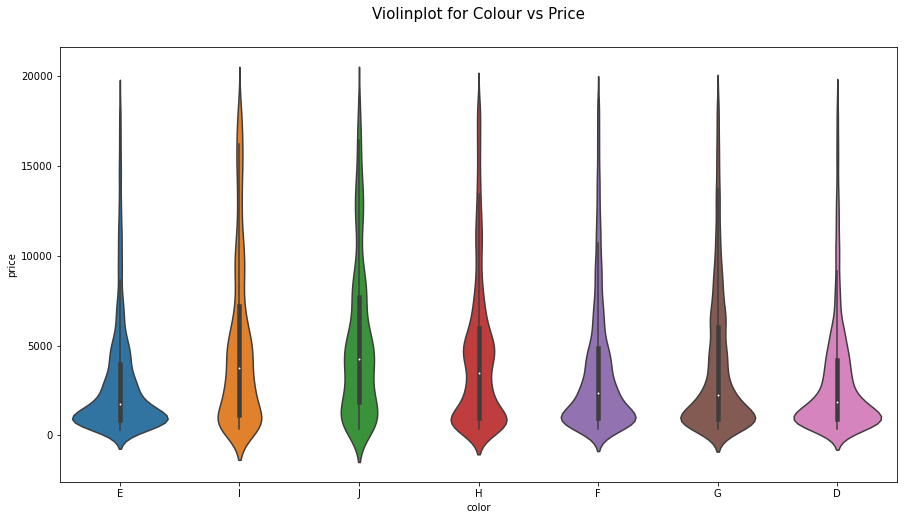

In [53]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(x="color",y="price",data=data)
ax.set_title('Violinplot for Colour vs Price', size=15, y=1.05)


Text(0.5, 1.05, 'Violinplot for Clarity vs Price')

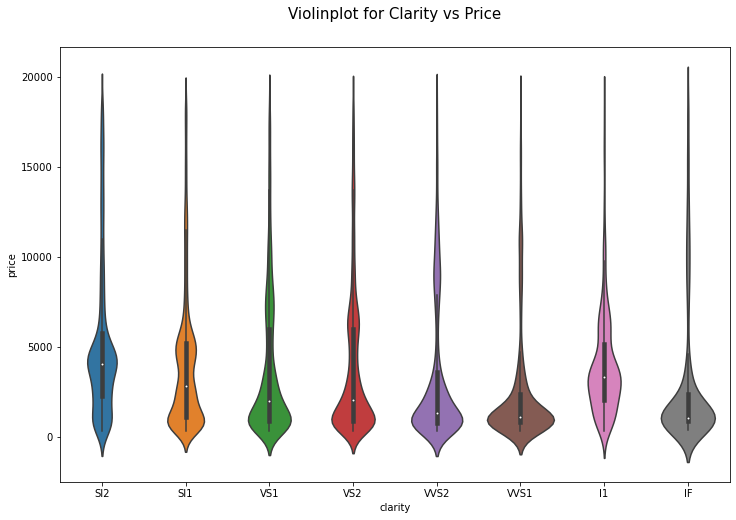

In [56]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(x="clarity",y="price",data=data)
ax.set_title('Violinplot for Clarity vs Price', size=15, y=1.05)


In [58]:
object_cols

['cut', 'color', 'clarity']

In [61]:
# a copy is made to avoid overwriting original data

label_data = data.copy()

label_encoder = LabelEncoder()

for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])

label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [63]:
data.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


<AxesSubplot:>

<Figure size 1080x1080 with 0 Axes>

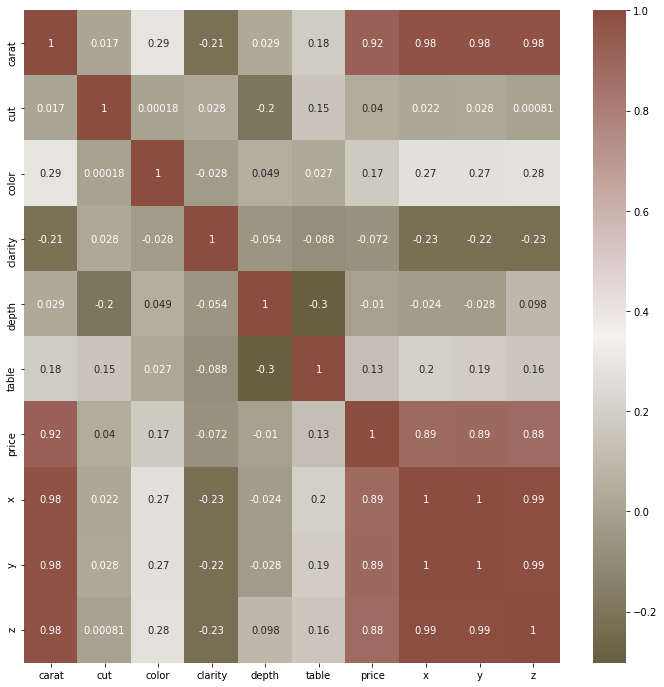

In [66]:
#correlation matrix
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [68]:
df_corr = label_data.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr[df_corr['Feature 1'] == 'price']

,Feature 1,Feature 2,Correlation Coefficient
7,price,price,1.000000
22,price,carat,0.921590
24,price,y,0.888807
26,price,x,0.887212
29,price,z,0.882634
56,price,color,0.172358
62,price,table,0.127108
68,price,clarity,0.071512
74,price,cut,0.039980
94,price,depth,0.010287


# **Model Building**

#### **Steps involved in Model Building**

- Setting up the features and targets
- Build a pipeline of standard scalar and model for 5 different regressors
- fit all the models on training data
- Get mean of cross-validation on the training set for all the models for negative root mean square error
- Pick the model with the best cross-validation score
- Fit the best model on the training set

In [69]:
# Assigning the featurs as X and target as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [70]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [72]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1348.811824 
DecisionTree: -755.471913 
RandomForest: -545.896360 
KNeighbors: -823.649442 
XGBRegressor: -545.458108 


In [73]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

In [74]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9810847980166805
Adjusted R^2: 0.9810721569817172
MAE: 278.0934000996743
MSE: 296738.36462685897
RMSE: 544.7369682946614
